Aggregated model accuracy: 0.7437000274658203


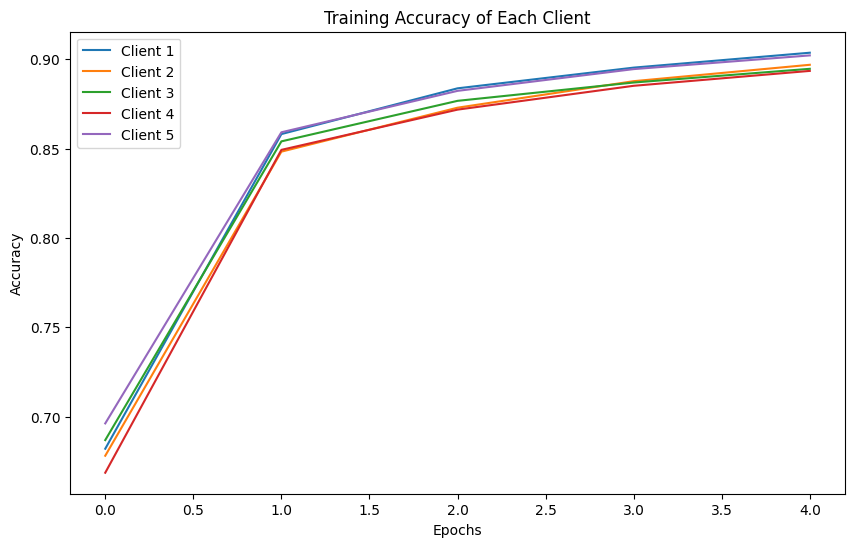

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Define the model
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Divide the dataset for federated clients
num_clients = 5
client_data_size = len(x_train) // num_clients
client_models = []
client_histories = []

# Train each client model
for i in range(num_clients):
    model = create_model()
    start, end = i * client_data_size, (i + 1) * client_data_size
    history = model.fit(x_train[start:end], y_train[start:end], epochs=5, batch_size=32, verbose=0)
    client_models.append(model)
    client_histories.append(history)

# Aggregating the models
weights = [model.get_weights() for model in client_models]
average_weights = [np.mean([w[i] for w in weights], axis=0) for i in range(len(weights[0]))]
aggregated_model = create_model()
aggregated_model.set_weights(average_weights)

# Evaluate the aggregated model
loss, accuracy = aggregated_model.evaluate(x_test, y_test, verbose=0)
print(f"Aggregated model accuracy: {accuracy}")

# Visualization of client training accuracies
plt.figure(figsize=(10, 6))
for i, history in enumerate(client_histories):
    plt.plot(history.history['accuracy'], label=f'Client {i+1}')
plt.title('Training Accuracy of Each Client')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
